In [1]:

# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import joblib


                                                TEXT      CATEGORY
0                           Help me find a job in IT  Career / Job
1                   Resume tips for fresh graduates?  Career / Job
2       What are the best career options after BCA??  Career / Job
3  I need advice on please tell me can you sugges...  Career / Job
4  Please tell me best online courses for job growth  Career / Job


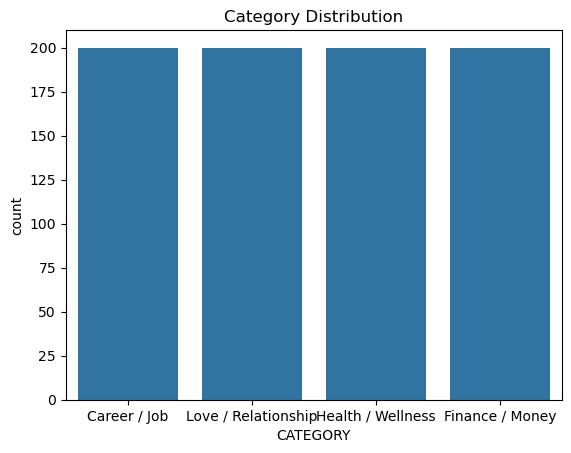

In [7]:
# 2. Load Dataset
df = pd.read_csv("report_queries_dataset_800.csv")   # make sure CSV is in same folder
print(df.head())

# Category distribution
sns.countplot(data=df, x="CATEGORY")
plt.title("Category Distribution")
plt.show()

In [11]:
# 3. Train-Test Split + Preprocessing
X = df["TEXT"]
y = df["CATEGORY"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [13]:

# 4. Train Logistic Regression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

y_pred_lr = log_reg.predict(X_test_tfidf)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
                     precision    recall  f1-score   support

       Career / Job       1.00      1.00      1.00        40
    Finance / Money       1.00      1.00      1.00        40
  Health / Wellness       1.00      1.00      1.00        40
Love / Relationship       1.00      1.00      1.00        40

           accuracy                           1.00       160
          macro avg       1.00      1.00      1.00       160
       weighted avg       1.00      1.00      1.00       160



In [15]:

# 5. Train Naive Bayes

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
                     precision    recall  f1-score   support

       Career / Job       1.00      1.00      1.00        40
    Finance / Money       1.00      1.00      1.00        40
  Health / Wellness       1.00      1.00      1.00        40
Love / Relationship       1.00      1.00      1.00        40

           accuracy                           1.00       160
          macro avg       1.00      1.00      1.00       160
       weighted avg       1.00      1.00      1.00       160



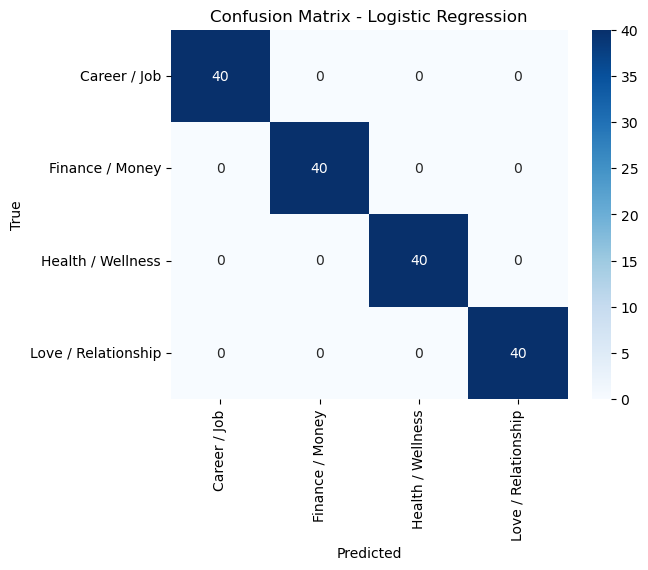

In [17]:

# 6. Confusion Matrix (Logistic Regression)

cm = confusion_matrix(y_test, y_pred_lr, labels=log_reg.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [19]:

# 7. Save Best Model

joblib.dump(log_reg, "best_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print("Best model and vectorizer saved successfully!")


Best model and vectorizer saved successfully!


In [21]:

# 8. Test with Custom Queries

sample_queries = [
    "I want to change my career path",
    "Does my partner really care about me?",
    "Best way to reduce stress naturally",
    "Should I invest in stocks or real estate?"
]

sample_tfidf = vectorizer.transform(sample_queries)
predictions = nb.predict(sample_tfidf)

for query, pred in zip(sample_queries, predictions):
    print(f"Query: {query} -> Predicted Category: {pred}")


Query: I want to change my career path -> Predicted Category: Career / Job
Query: Does my partner really care about me? -> Predicted Category: Love / Relationship
Query: Best way to reduce stress naturally -> Predicted Category: Finance / Money
Query: Should I invest in stocks or real estate? -> Predicted Category: Finance / Money
